<a href="https://colab.research.google.com/github/mesimoa/module-6/blob/main/abiola_mesimo_module_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 38ms/step - accuracy: 0.7568 - loss: 0.6659 - val_accuracy: 0.8744 - val_loss: 0.3573
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.8806 - loss: 0.3275 - val_accuracy: 0.8665 - val_loss: 0.3514
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 36ms/step - accuracy: 0.8970 - loss: 0.2767 - val_accuracy: 0.9002 - val_loss: 0.2771
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.9105 - loss: 0.2428 - val_accuracy: 0.9020 - val_loss: 0.2695
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9187 - loss: 0.2218 - val_accuracy: 0.8998 - val_loss: 0.2755
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step - accuracy: 0.9263 - loss: 0.1975 - val_accuracy: 0.8918 - val_loss: 0.2966
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.9322 - loss: 0.1770 - val_accuracy: 0.9071 - val_loss: 0.2664
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.9396 -

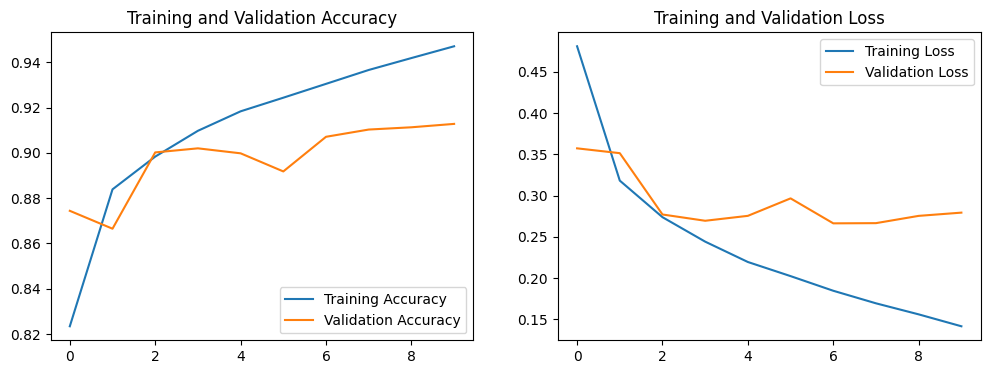

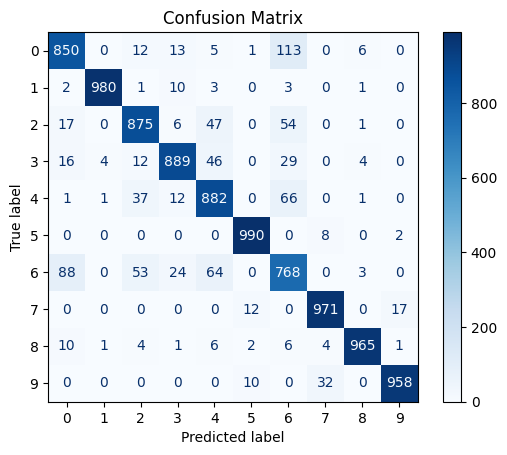

(0.9140946725470244, 0.9128000000000001, 0.9128000140190125)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the images
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Convert labels to categorical
train_labels_categorical = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model with additional metrics: precision and recall
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_categorical, epochs=10, validation_data=(test_images, test_labels_categorical))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels_categorical)

# Predictions for the entire test set
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels_categorical, axis=1)

# Calculate precision and recall
precision = precision_score(true_classes, predicted_classes, average='macro')
recall = recall_score(true_classes, predicted_classes, average='macro')

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))

# Plot confusion matrix
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Output precision, recall, and test accuracy
precision, recall, test_acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted class: 9, Actual class: 9


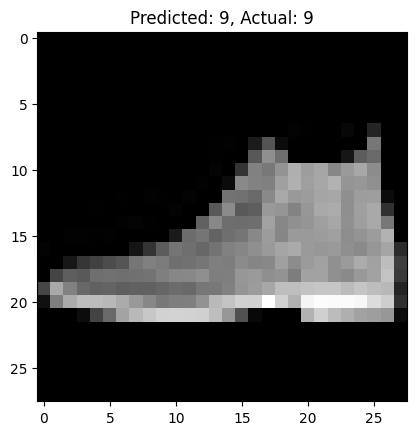

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted class: 2, Actual class: 2


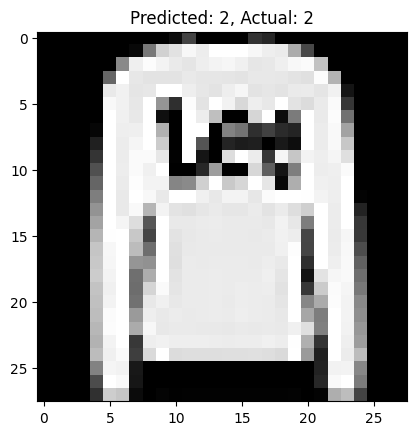

In [ ]:
# Make predictions for specific images
image_indices = [0, 1]  # Choose two images to predict

for index in image_indices:
    image = test_images[index]
    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(test_labels_categorical[index])

    print(f"Predicted class: {predicted_class}, Actual class: {actual_class}")
    plt.imshow(image[:, :, 0], cmap='gray')
    plt.title(f"Predicted: {predicted_class}, Actual: {actual_class}")
    plt.show()